# Data Exploration

In [1]:
import json
import zipfile
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

Define absolute path to data.

In [2]:
data_path = ABSOLUTE_PATH_TO_DATA
unzipped_path = data_path+"/unzipped/"

Define examples for OK and non-OK behaviour and read them.

In [3]:
ok_files = ["OpcUA_PANE_BZ___2022_03_16__11_05_01.csv", "OpcUA_PANE_BZ___2021_12_20__07_49_41.csv",
            "OpcUA_PANE_BZ___2021_12_20__10_05_33.csv"]
nok_files = ["OpcUA_PANE_BZ___2021_12_21__10_33_00.csv", "OpcUA_PANE_BZ___2022_03_16__08_43_38.csv",
             "OpcUA_PANE_BZ___2022_05_24__15_16_19.csv", "OpcUA_PANE_BZ___2022_05_24__08_31_56.csv",
             "OpcUA_PANE_BZ___2022_05_25__09_44_06.csv"]

In [4]:
ok_dfs = []
for file in ok_files:
    ok_dfs.append(pd.read_csv(data_path+"/csv/"+file, index_col=0))
ok_df_merged = pd.concat(ok_dfs)
    
nok_dfs = []
for file in nok_files:
    nok_dfs.append(pd.read_csv(data_path+"/csv/"+file, index_col=0))
nok_df_merged = pd.concat(nok_dfs)

In [5]:
ok_dfs[0].columns

Index(['distanceSensors[0].calcValueInMm', 'distanceSensors[1].calcValueInMm',
       'distanceSensors[2].calcValueInMm',
       'quadroSensorsAutoCommands[0].setpointInMm',
       'quadroSensorsAutoCommands[1].setpointInMm',
       'quadroSensorsAutoCommands[2].setpointInMm',
       'fConverters[3].rpdo.setpointPercentOfRpm',
       'fConverters[3].speed.actualMillimeterPerSecond',
       'fConverters[4].rpdo.setpointPercentOfRpm',
       '.fConverters[4].speed.actualMillimeterPerSecond',
       'safetyIOs.image.i11', 'safetyIOs.image.i12', 'safetyIOs.image.i15',
       'safetyIOs.image.iq2', 'safetyIOs.image.iq3',
       'fConverters[2].rpdo.setpointPercentOfRpm',
       'fConverters[2].speed.actualMillimeterPerSecond',
       'fConverters[2].currentCurrent', 'fConverters[2].nodeStatus',
       'fConverters[3].currentCurrent', 'fConverters[3].nodeStatus',
       'fConverters[4].currentCurrent', 'fConverters[4].nodeStatus'],
      dtype='object')

## Explore Other Process Parameters in Conjunction

In the following cells, the OK and nOK samples are plotted against other process parameters, to see whether any patterns occur. The number of examples given is not sufficient for statistical analysis concerning possible causes. Therefore, manual inspection is performed to infer information about the state of other sensors during normal and anomaly behavior.

Findings:

### OK

OK Einlauf.

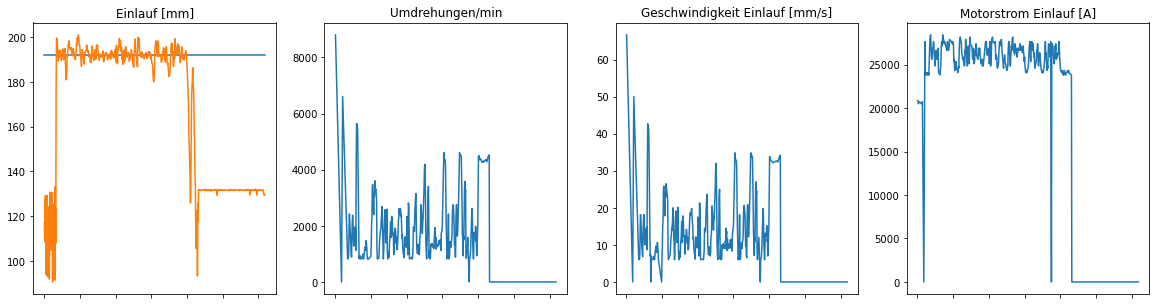

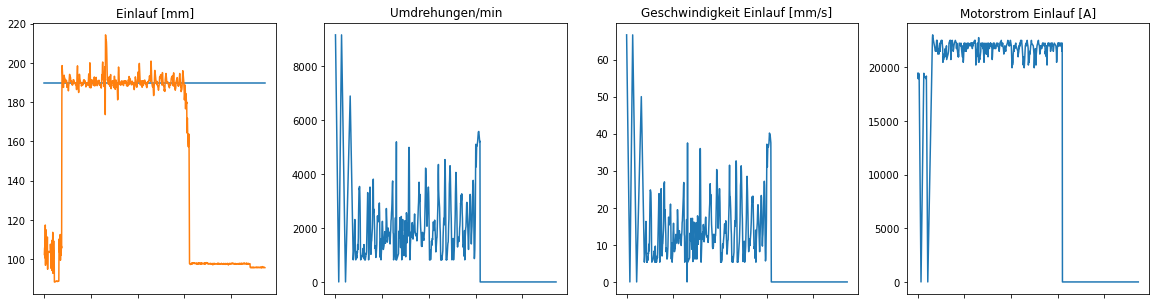

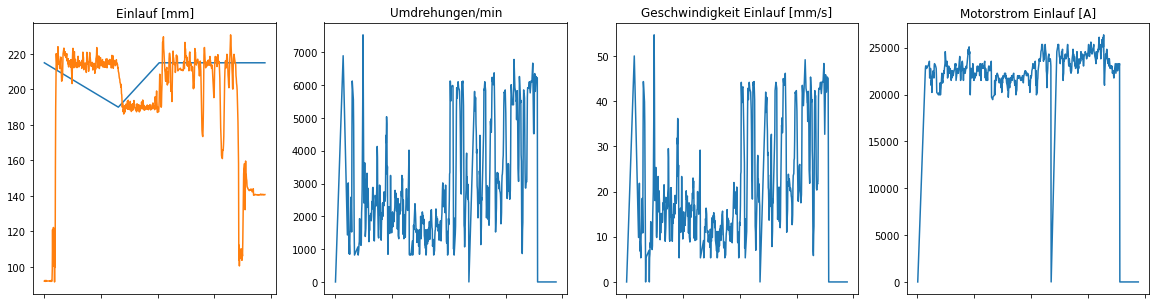

In [6]:
for ok_df in ok_dfs:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    ax1.tick_params(labelbottom=False)
    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelbottom=False)
    ax4.tick_params(labelbottom=False)
    ok_df["quadroSensorsAutoCommands[0].setpointInMm"].plot(label="SOLL", ax=ax1)
    ok_df["distanceSensors[0].calcValueInMm"].plot(label="IST", ax=ax1)
    ax1.set_title('Einlauf [mm]')
    ok_df["fConverters[2].rpdo.setpointPercentOfRpm"].plot(ax=ax2)
    ax2.set_title('Umdrehungen/min')
    ok_df["fConverters[2].speed.actualMillimeterPerSecond"].plot(ax=ax3)
    ax3.set_title('Geschwindigkeit Einlauf [mm/s]')
    ok_df["fConverters[2].currentCurrent"].plot(ax=ax4)
    ax4.set_title('Motorstrom Einlauf [A]')
    # plt.legend()
    plt.show()

OK Durchlauf.

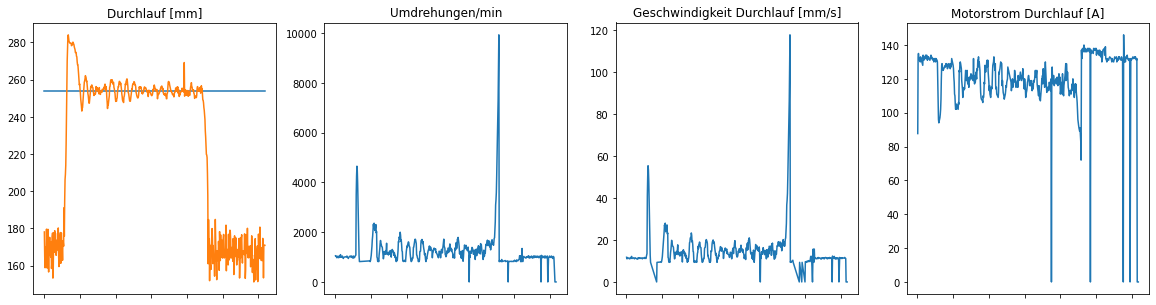

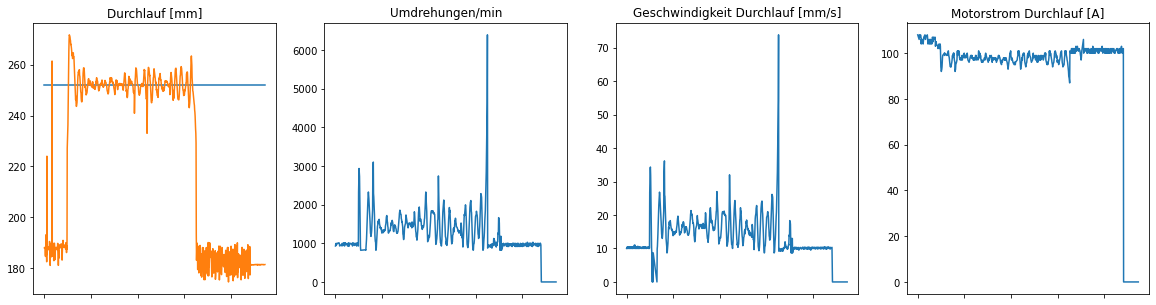

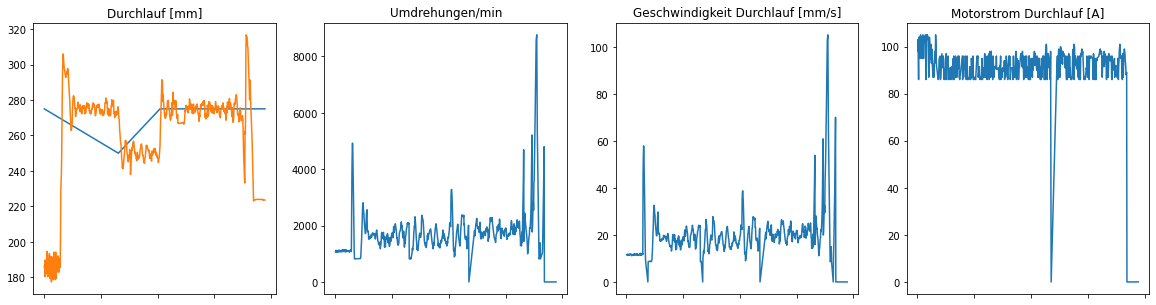

In [7]:
for ok_df in ok_dfs:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    ax1.tick_params(labelbottom=False)
    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelbottom=False)
    ax4.tick_params(labelbottom=False)
    ok_df["quadroSensorsAutoCommands[1].setpointInMm"].plot(label="SOLL", ax=ax1)
    ok_df["distanceSensors[1].calcValueInMm"].plot(label="IST", ax=ax1)
    ax1.set_title('Durchlauf [mm]')
    ok_df["fConverters[3].rpdo.setpointPercentOfRpm"].plot(ax=ax2)
    ax2.set_title('Umdrehungen/min')
    ok_df["fConverters[3].speed.actualMillimeterPerSecond"].plot(ax=ax3)
    ax3.set_title('Geschwindigkeit Durchlauf [mm/s]')
    ok_df["fConverters[3].currentCurrent"].plot(ax=ax4)
    ax4.set_title('Motorstrom Durchlauf [A]')
    # plt.legend()
    plt.show()

OK Auslauf.

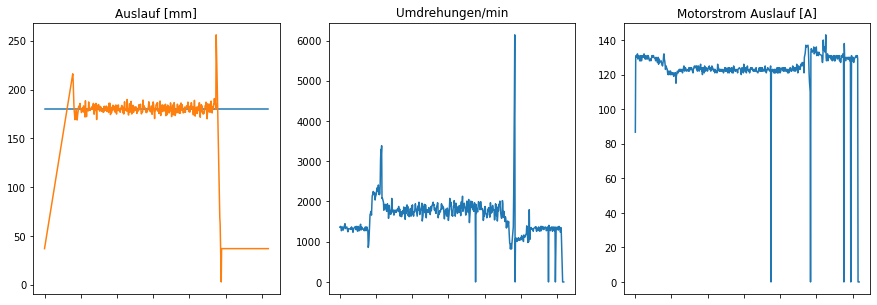

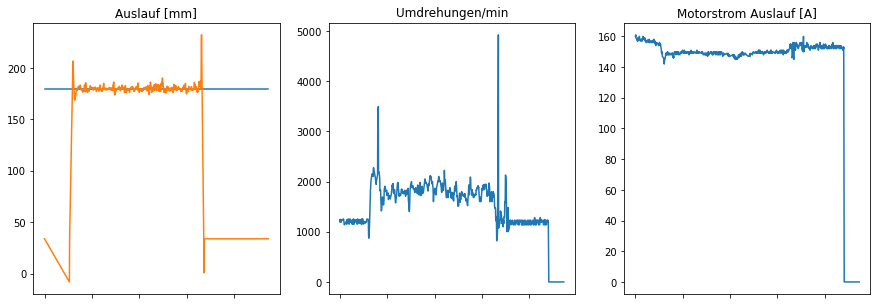

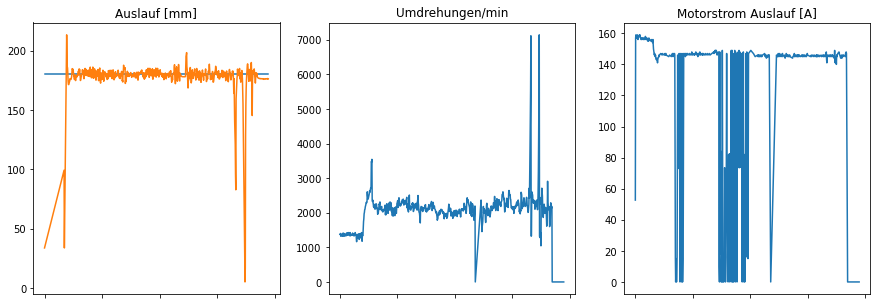

In [8]:
for ok_df in ok_dfs:
    fig, (ax1, ax2, ax4) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.tick_params(labelbottom=False)
    ax2.tick_params(labelbottom=False)
    ax4.tick_params(labelbottom=False)
    ok_df["quadroSensorsAutoCommands[2].setpointInMm"].plot(label="SOLL", ax=ax1)
    ok_df["distanceSensors[2].calcValueInMm"].plot(label="IST", ax=ax1)
    ax1.set_title('Auslauf [mm]')
    ok_df["fConverters[4].rpdo.setpointPercentOfRpm"].plot(ax=ax2)
    ax2.set_title('Umdrehungen/min')
    ok_df["fConverters[4].currentCurrent"].plot(ax=ax4)
    ax4.set_title('Motorstrom Auslauf [A]')
    # plt.legend()
    plt.show()

### nOK

nOK Einlauf

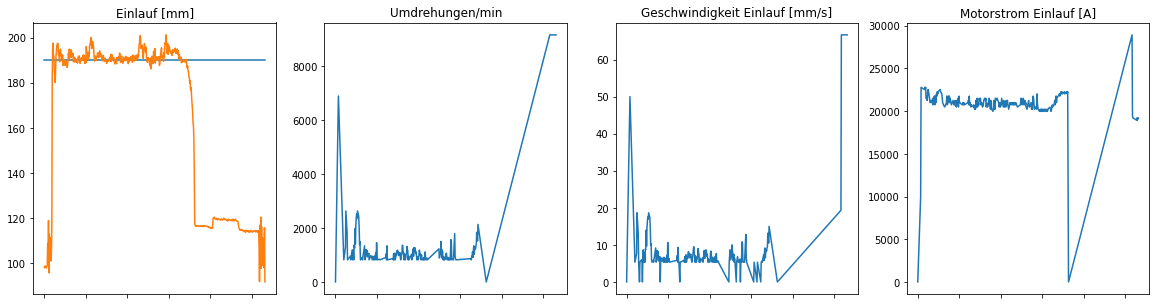

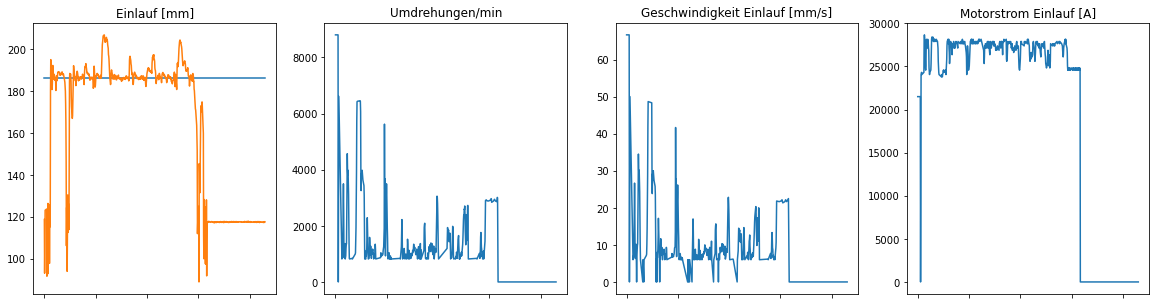

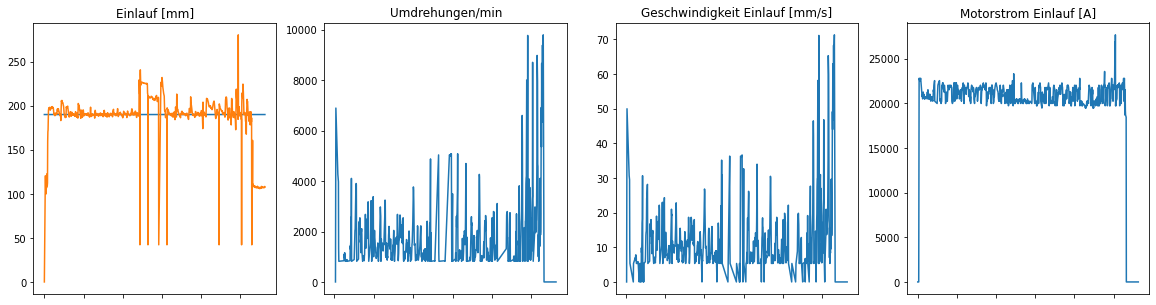

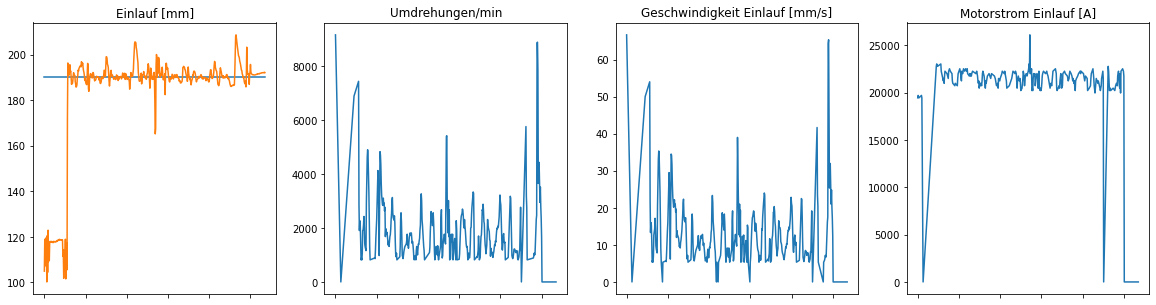

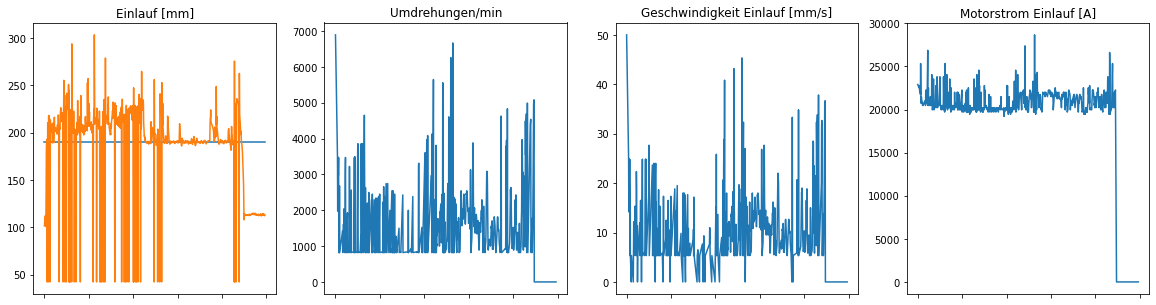

In [9]:
for nok_df in nok_dfs:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    ax1.tick_params(labelbottom=False)
    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelbottom=False)
    ax4.tick_params(labelbottom=False)
    nok_df["quadroSensorsAutoCommands[0].setpointInMm"].plot(label="SOLL", ax=ax1)
    nok_df["distanceSensors[0].calcValueInMm"].plot(label="IST", ax=ax1)
    ax1.set_title('Einlauf [mm]')
    nok_df["fConverters[2].rpdo.setpointPercentOfRpm"].plot(ax=ax2)
    ax2.set_title('Umdrehungen/min')
    nok_df["fConverters[2].speed.actualMillimeterPerSecond"].plot(ax=ax3)
    ax3.set_title('Geschwindigkeit Einlauf [mm/s]')
    nok_df["fConverters[2].currentCurrent"].plot(ax=ax4)
    ax4.set_title('Motorstrom Einlauf [A]')
    # plt.legend()
    plt.show()

nOK Durchlauf

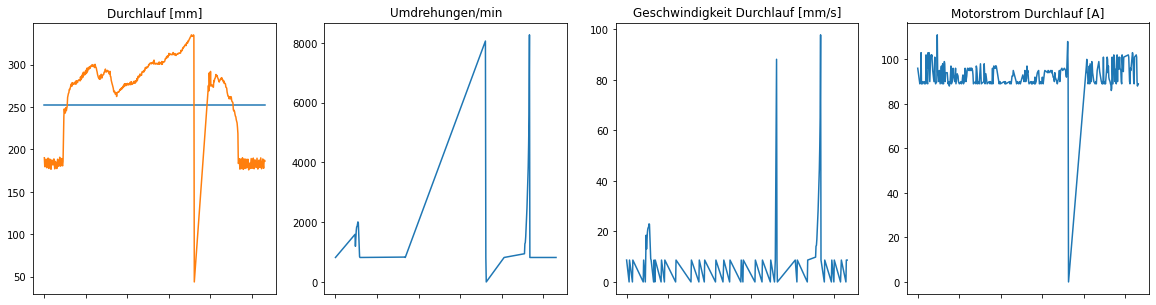

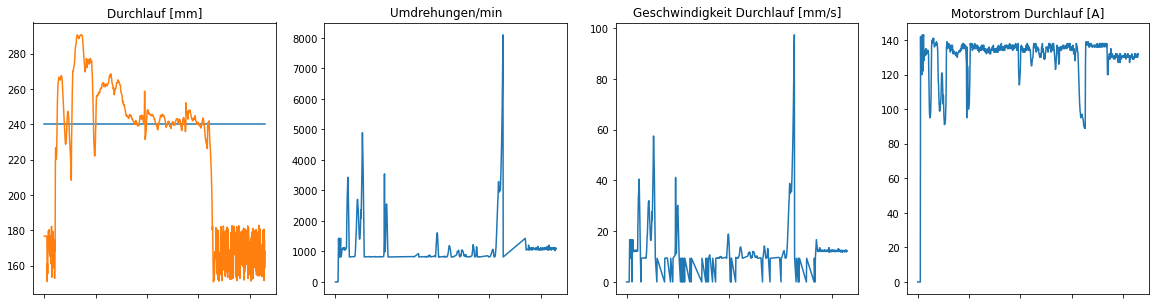

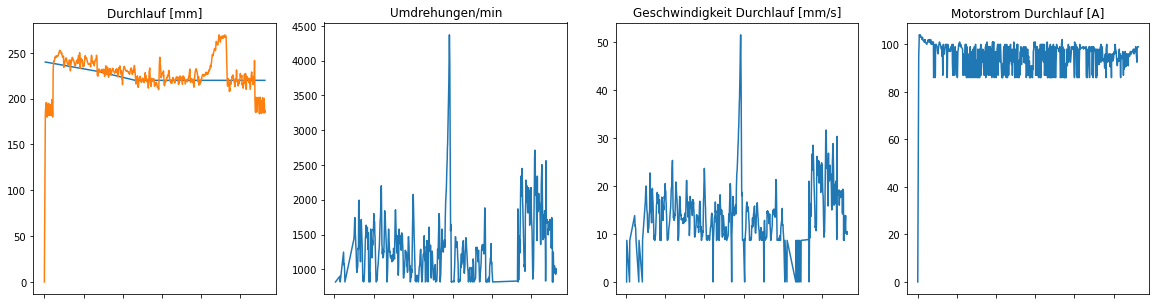

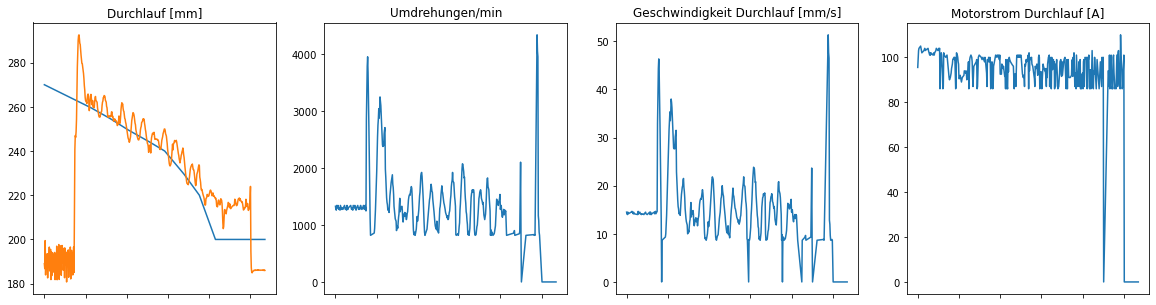

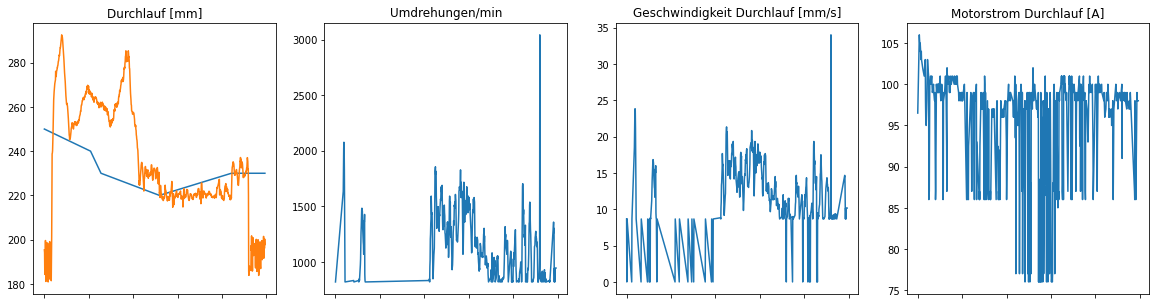

In [10]:
for nok_df in nok_dfs:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    ax1.tick_params(labelbottom=False)
    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelbottom=False)
    ax4.tick_params(labelbottom=False)
    nok_df["quadroSensorsAutoCommands[1].setpointInMm"].plot(label="SOLL", ax=ax1)
    nok_df["distanceSensors[1].calcValueInMm"].plot(label="IST", ax=ax1)
    ax1.set_title('Durchlauf [mm]')
    nok_df["fConverters[3].rpdo.setpointPercentOfRpm"].plot(ax=ax2)
    ax2.set_title('Umdrehungen/min')
    nok_df["fConverters[3].speed.actualMillimeterPerSecond"].plot(ax=ax3)
    ax3.set_title('Geschwindigkeit Durchlauf [mm/s]')
    nok_df["fConverters[3].currentCurrent"].plot(ax=ax4)
    ax4.set_title('Motorstrom Durchlauf [A]')
    # plt.legend()
    plt.show()

nOK Auslauf

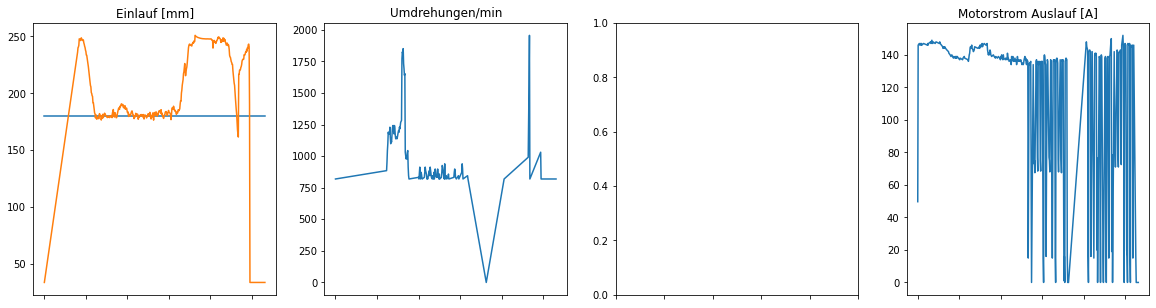

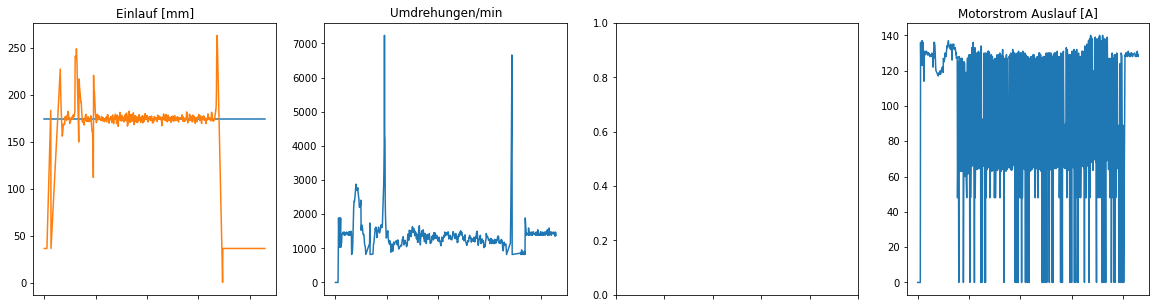

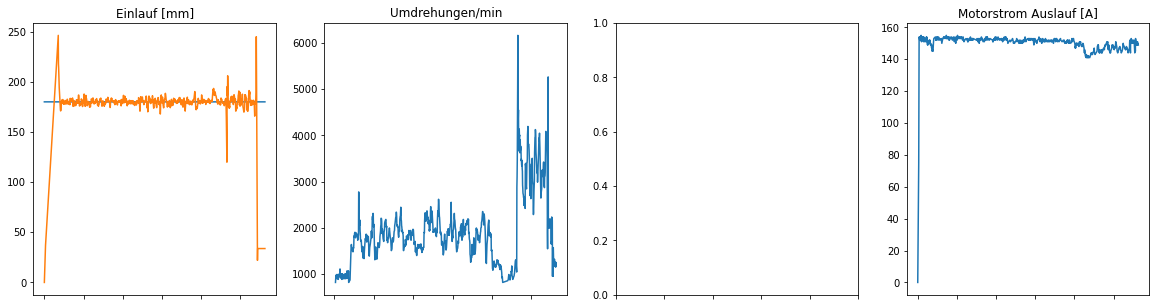

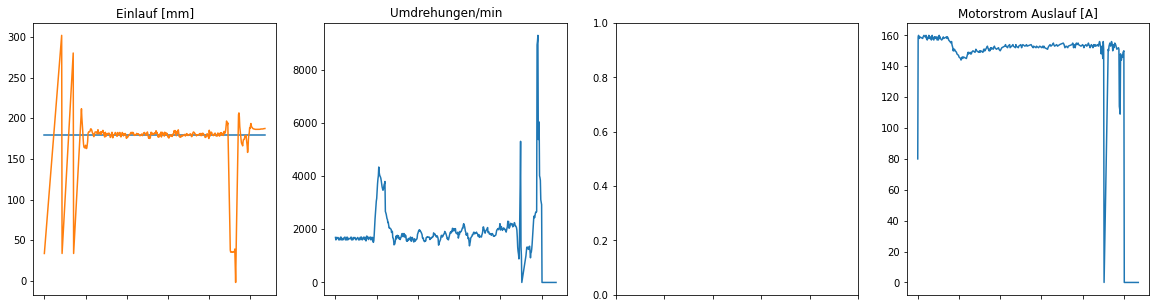

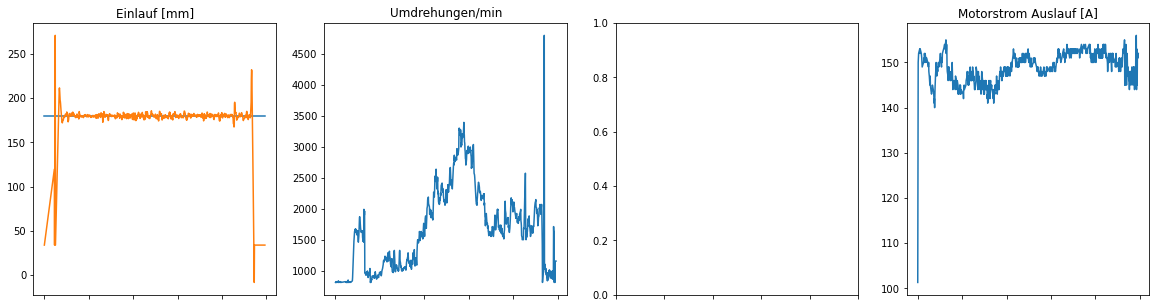

In [11]:
for nok_df in nok_dfs:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
    ax1.tick_params(labelbottom=False)
    ax2.tick_params(labelbottom=False)
    ax3.tick_params(labelbottom=False)
    ax4.tick_params(labelbottom=False)
    nok_df["quadroSensorsAutoCommands[2].setpointInMm"].plot(label="SOLL", ax=ax1)
    nok_df["distanceSensors[2].calcValueInMm"].plot(label="IST", ax=ax1)
    ax1.set_title('Einlauf [mm]')
    nok_df["fConverters[4].rpdo.setpointPercentOfRpm"].plot(ax=ax2)
    ax2.set_title('Umdrehungen/min')
#     nok_df["fConverters[4].speed.actualMillimeterPerSecond"].plot(ax=ax3)
#     ax3.set_title('Geschwindigkeit Einlauf [mm/s]')
    nok_df["fConverters[4].currentCurrent"].plot(ax=ax4)
    ax4.set_title('Motorstrom Auslauf [A]')
    # plt.legend()
    plt.show()